# Exploratory Data Analysis (EDA) with NILMTK API

EDA is used by data scientists to analyze and investigate this UK-DALE dataset.  It summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.  This is to explore more API functions from NILMTK.

- Created Date : 16/4/2022
- Updated Date : 18/4/2022
- Author : KK Yong

**References:**
- [NILMTK API documentation](http://nilmtk.github.io/nilmtk/master/index.html)
- N. Batra et al., “[A demonstration of reproducible state-of-the-art energy disaggregation using NILMTK](https://nipunbatra.github.io/papers/2019/batra_buildsys19demo.pdf)” in Proceedings of the 6th ACM International Conference on Systems for Energy-Efficient Buildings, Cities, and Transportation, Nov. 2019, pp. 358–359, doi: 10.1145/3360322.3360999.
- J. Kelly et al., “[NILMTK v0.2: a non-intrusive load monitoring toolkit for large scale data sets](https://arxiv.org/pdf/1409.5908.pdf)” in Proceedings of the 1st ACM Conference on Embedded Systems for Energy-Efficient Buildings, Nov. 2014, pp. 182–183, doi: 10.1145/2674061.2675024.


In [2]:
import warnings
import dateutil

import matplotlib.pyplot as plt
import pandas as pd

import nilmtk as ntk

# Initialization for Python and NILMTK

Let's kick-off to process and analysis the data with Python.

In [3]:
import dateutil
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime

import nilmtk as ntk
import utility as ut

## Define constant and global variable

In [4]:
plt.rcParams['figure.figsize'] = [15, 10]
RAW_FILENAME = "../../../ukdale/ukdale.h5"

START_TS ='2013-08-01 00:00:00'
END_TS='2013-08-31 23:59:59'

## Initial NILMTK with loading data for House/Building 1

In [5]:
# Create object for ukdale
ukdale = ntk.DataSet(RAW_FILENAME)

# Set the duration of data to be extract
ukdale.set_window(start=START_TS,end=END_TS)

# Create object for house data
house_data = ukdale.buildings[1].elec

In [6]:
house_data.mains()

ElecMeter(instance=54, building=1, dataset='UK-DALE', site_meter, appliances=[Appliance(type='immersion heater', instance=1), Appliance(type='water pump', instance=1), Appliance(type='security alarm', instance=1), Appliance(type='fan', instance=2), Appliance(type='drill', instance=1), Appliance(type='laptop computer', instance=2)])

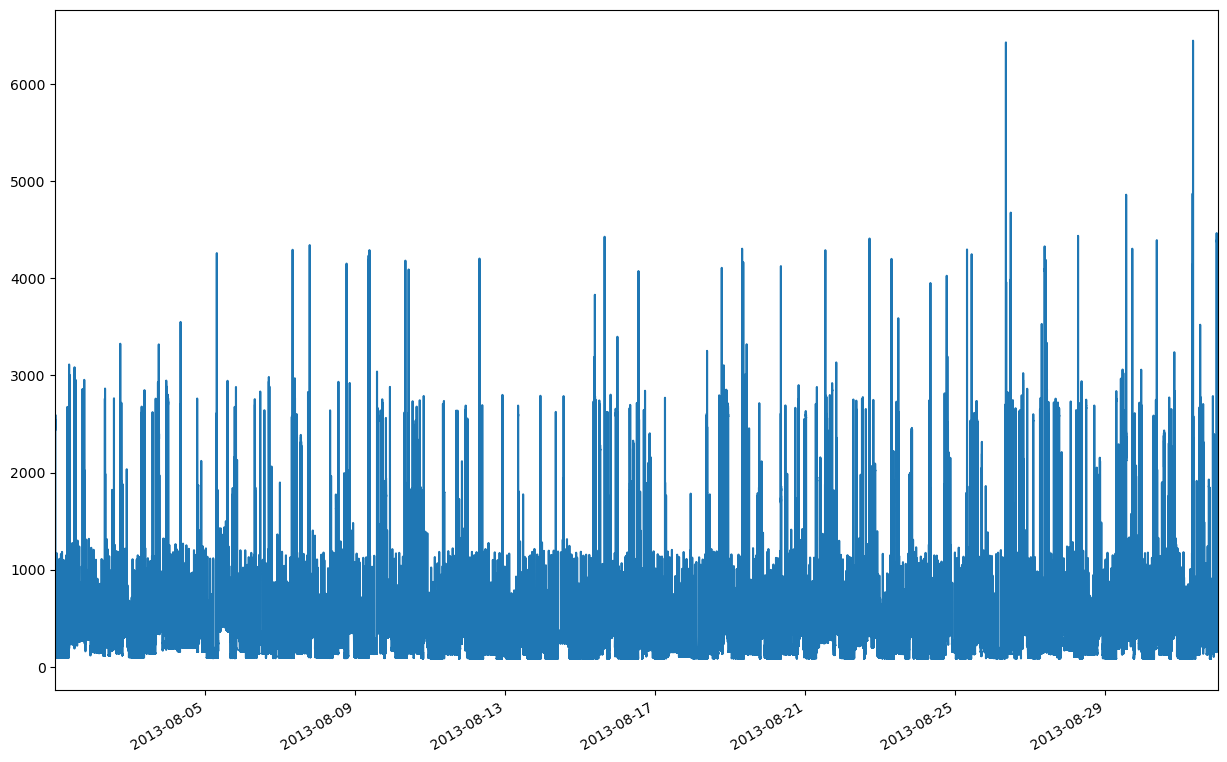

In [7]:
house_data.mains().power_series_all_data().plot.line()

# Using NILMTK APIs to perform statistical analysis

This is to see the proportion of energy main and submeter in house/building 1

In [8]:
house_data.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


C:\Users\chaut\Anaconda3\envs\nilmtk-env\lib\site-packages\nilmtk\preprocessing\clip.py:49: RuntimeWarning: No measurement limits for ('voltage', '').
  warn('No measurement limits for {}.'.format(measurement), RuntimeWarning)


0.7700185827302709

### Get information for the Type of Poware -  Active, apparent and reactive power for 'house_data' object

In [9]:
house_data.available_ac_types('power')

['active', 'apparent']

In [10]:
house_data.mains().available_ac_types('power')

['active', 'apparent']

In [11]:
house_data.submeters().available_ac_types('power')

['active', 'apparent']

###  Execute NILMTK Statistical APIs

In [12]:
# Total Energy returns in 'kWh'

house_data.mains().total_energy() 

active      211.301388
apparent    248.770256
dtype: float64

In [13]:
# Energy use per submeter

house_data.submeters().energy_per_meter()

52/52 ElecMeter(instance=53, building=1, dataset='UK-DALE', appliances=[Appliance(type='printer', instance=1)])ance=1)])e(type='external hard disk', instance=1)])e=2), Appliance(type='radio', instance=3)])1)])

,"(2, 1, UK-DALE)","(3, 1, UK-DALE)","(4, 1, UK-DALE)","(5, 1, UK-DALE)","(6, 1, UK-DALE)","(7, 1, UK-DALE)","(8, 1, UK-DALE)","(9, 1, UK-DALE)","(10, 1, UK-DALE)","(11, 1, UK-DALE)",...,"(44, 1, UK-DALE)","(45, 1, UK-DALE)","(46, 1, UK-DALE)","(47, 1, UK-DALE)","(48, 1, UK-DALE)","(49, 1, UK-DALE)","(50, 1, UK-DALE)","(51, 1, UK-DALE)","(52, 1, UK-DALE)","(53, 1, UK-DALE)"
active,NaN,NaN,1.582803,13.436984,11.851634,9.548159,NaN,11.381778,11.871536,7.682192,...,0.005134,0.017036,0.002013,0.089323,0.096106,0.10191,0.05218,2.777533,0.798261,NaN
apparent,0.304289,11.680517,NaN,NaN,NaN,NaN,7.561492,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Notes:***

**column headings** are the ElecMeter instance numbers.  You can try to do "**print(house_data)**" or other APIs to further exploration.

The function fraction_per_meter does the same thing as energy_per_submeter but returns the fraction of energy per meter.

### Select meters on the basis of their energy consumption
Let's make a new MeterGroup which only contains the ElecMeters which used more than 10 kWh:

In [14]:
# energy_per_meter is a DataFrame where each row is a 
# power type ('active', 'reactive' or 'apparent').
# All appliance meters in REDD are record 'active' so just select
# the 'active' row:
energy_per_meter = house_data.submeters().energy_per_meter()

energy_per_meter = energy_per_meter.loc['active']
more_than_10 = energy_per_meter[energy_per_meter > 10]
more_than_10

52/52 ElecMeter(instance=53, building=1, dataset='UK-DALE', appliances=[Appliance(type='printer', instance=1)])ance=1)])e(type='external hard disk', instance=1)])e=2), Appliance(type='radio', instance=3)])1)])

(5, 1, UK-DALE)     13.436984
(6, 1, UK-DALE)     11.851634
(9, 1, UK-DALE)     11.381778
(10, 1, UK-DALE)    11.871536
(12, 1, UK-DALE)    34.810067
Name: active, dtype: float64

In [15]:
instances = more_than_10.index
instances

Index([ (5, 1, 'UK-DALE'),  (6, 1, 'UK-DALE'),  (9, 1, 'UK-DALE'),
       (10, 1, 'UK-DALE'), (12, 1, 'UK-DALE')],
      dtype='object')

## Plot fraction of energy consumption of each appliance

In [16]:
# Remove Null records
fraction = house_data.submeters().fraction_per_meter().dropna()

52/52 ElecMeter(instance=53, building=1, dataset='UK-DALE', appliances=[Appliance(type='printer', instance=1)])ance=1)])e(type='external hard disk', instance=1)])e=2), Appliance(type='radio', instance=3)])1)])

C:\Users\chaut\Anaconda3\envs\nilmtk-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


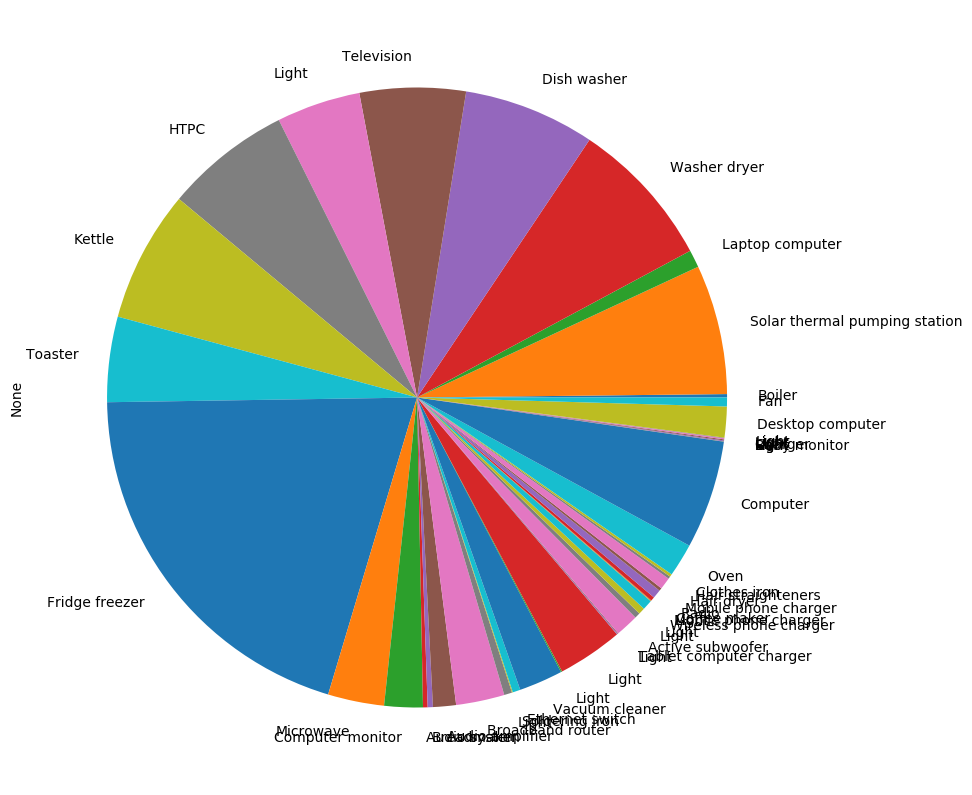

In [17]:
# Create convenient labels
labels = house_data.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels);

### Enhancing Data Visualization

C:\Users\chaut\Anaconda3\envs\nilmtk-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


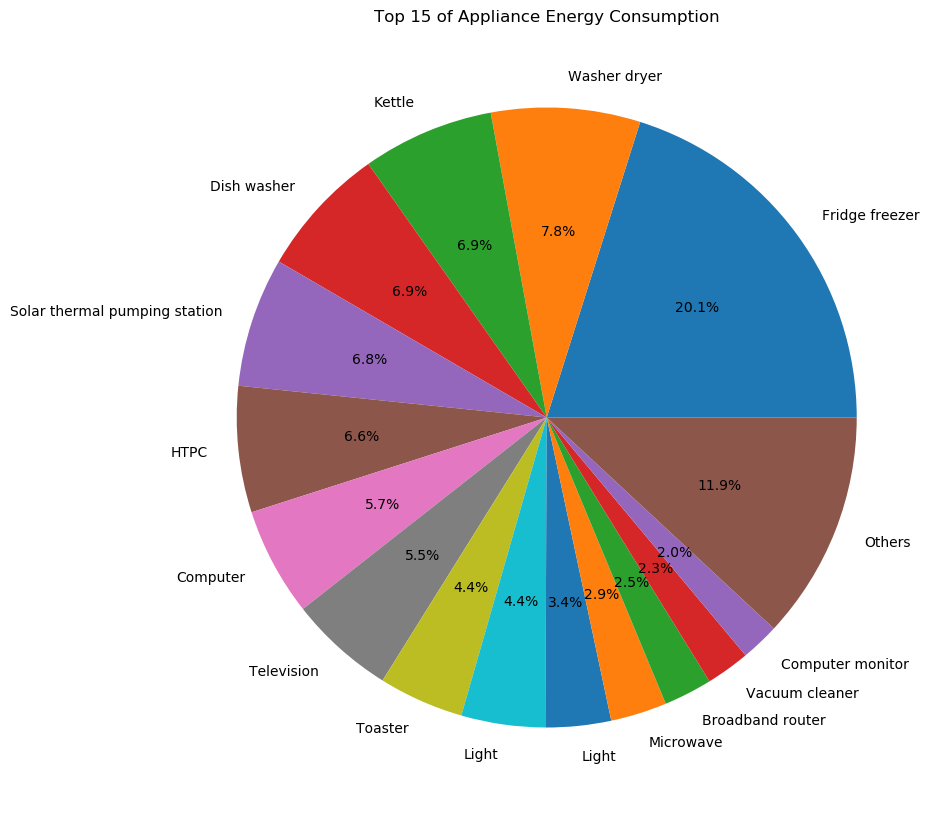

In [18]:
# Sorting the value to descending order
fraction_sorted = fraction.sort_values(ascending=False)

# Create series object for the top 10 appliance
fraction_top = fraction_sorted.head(15)

# Sum up the Other appliance value
others_val = 1 - fraction_top.sum()
fraction_top

# Create Pie Chart

labels = house_data.get_labels(fraction_top.index)
labels.append('Others')

fraction_top['Others'] = others_val
plt.figure(figsize=(10,30))
fraction_top.plot(kind='pie', labels=labels, 
                  title="Top 15 of Appliance Energy Consumption", 
                  autopct='%1.1f%%', label="");

C:\Users\chaut\Anaconda3\envs\nilmtk-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


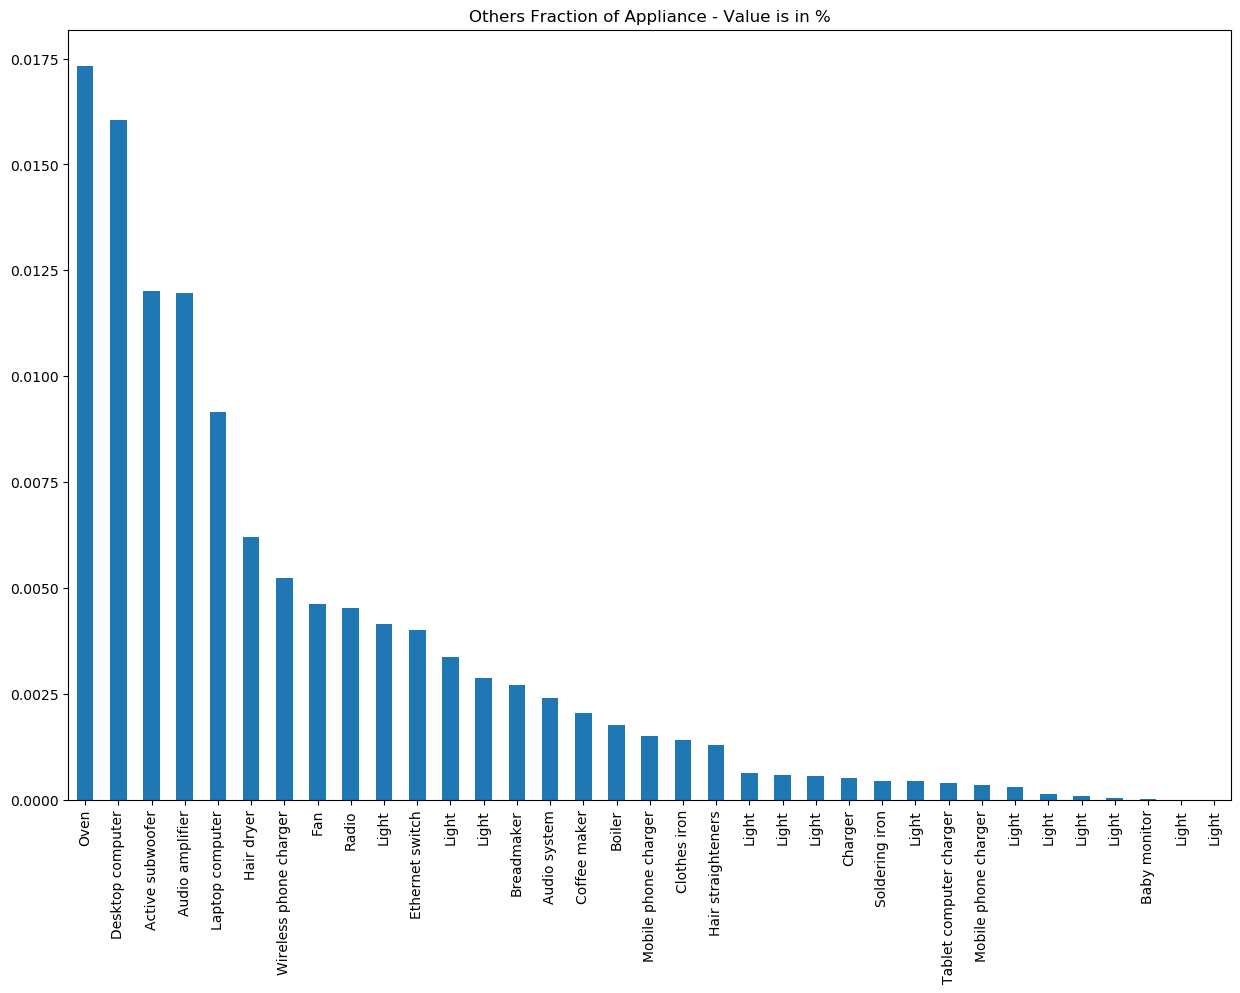

In [19]:
# Create variable to store the 'Others' items
fraction_others = fraction_sorted.iloc[15:]

# Change series of index values, thus, bar chart x-label shows appliance name
idx_labels = house_data.get_labels(fraction_others.index)
fraction_others.index = idx_labels

# Plot bar chart
fraction_others.plot(kind='bar', x=labels, title="Others Fraction of Appliance - Value is in %")

### Wiring Diagram

This is useful to quick view for nested MetaGroup or its categories.  However, if there are a lot of items, it won't show unreadable.  

If there is two or three levels in its meter hierachy, then can use the API, for example, **"house_data.meters_directly_downstream_of_mains()"**.

(<networkx.classes.digraph.DiGraph at 0x20452911f40>,
 <matplotlib.axes._axes.Axes at 0x20452906940>)

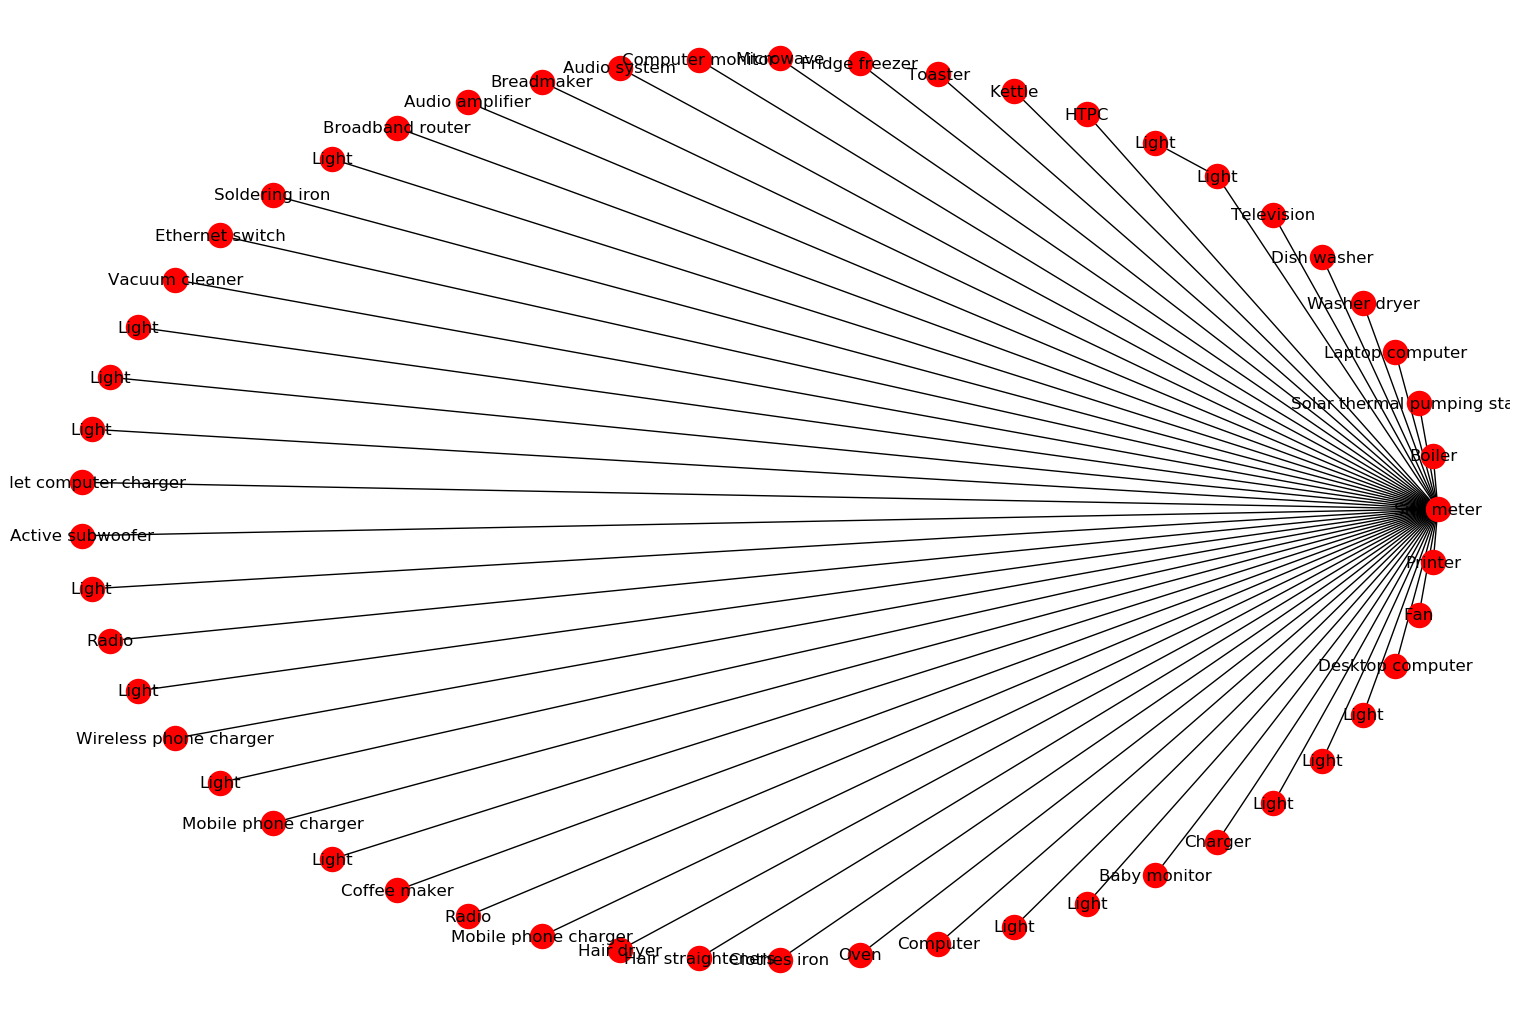

In [20]:
house_data.draw_wiring_graph()

### Plot appliances when they are in use

C:\Users\chaut\Anaconda3\envs\nilmtk-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


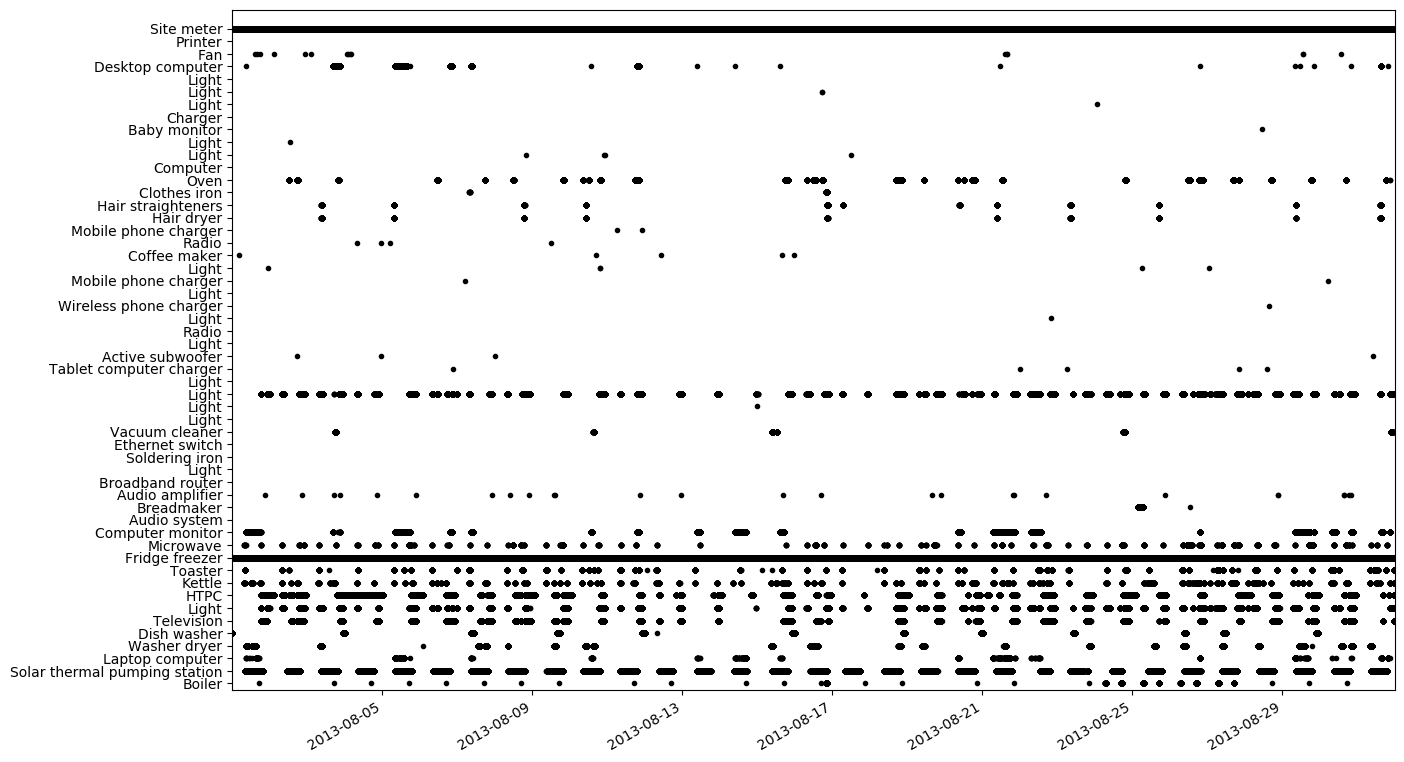

In [21]:
house_data.plot_when_on(on_power_threshold = 40)

## Stats and info for individual meters - e.g. Fridge

The ElecMeter class represents a single electricity meter. Each ElecMeter has a list of associated Appliance objects.  ElecMeter has many of the same stats methods as MeterGroup such as total_energy and available_power_ac_types and power_series and power_series_all_data. We will now explore some more stats functions (many of which are also available on MeterGroup)...

In [31]:
fridge_meter = house_data['fridge']

In [32]:
#Get upstream meter

fridge_meter.upstream_meter() # happens to be the mains meter group!

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='UK-DALE', site_meter, appliances=[Appliance(type='immersion heater', instance=1), Appliance(type='water pump', instance=1), Appliance(type='security alarm', instance=1), Appliance(type='fan', instance=2), Appliance(type='drill', instance=1), Appliance(type='laptop computer', instance=2)])
  ElecMeter(instance=54, building=1, dataset='UK-DALE', site_meter, appliances=[Appliance(type='immersion heater', instance=1), Appliance(type='water pump', instance=1), Appliance(type='security alarm', instance=1), Appliance(type='fan', instance=2), Appliance(type='drill', instance=1), Appliance(type='laptop computer', instance=2)])
)

In [33]:
# Metadata about the class of meter

fridge_meter.device

{'brand': 'EcoManager',
 'brand_url': 'http://www.edfenergy.com/products-services/for-your-home/ecomanager',
 'data_logger': {'creators': ['Jack Kelly'],
  'model': 'rfm_ecomanager_logger',
  'model_url': 'https://github.com/JackKelly/rfm_ecomanager_logger'},
 'manufacturer': 'Current Cost / Sailwider',
 'max_sample_period': 120,
 'measurements': [{'upper_limit': 3300,
   'lower_limit': 0,
   'physical_quantity': 'power',
   'type': 'active'}],
 'model': 'EcoManagerTxPlug',
 'model_url': 'https://shop.edfenergy.com/Item.aspx?id=540',
 'sample_period': 6,
 'seller': 'EDF Energy',
 'wireless': True,
 'wireless_configuration': {'base': 'creators: [Jack Kelly] model: rfm_edf_ecomanager model_url: https://github.com/JackKelly/rfm_edf_ecomanager/\n',
  'protocol': 'custom',
  'carrier_frequency': 434}}

In [34]:
# Dominant appliance
#
# If the metadata specifies that a meter has multiple meters connected to it then one 
# of those can be specified as the 'dominant' appliance, and this appliance can be retrieved 
# with this method

fridge_meter.dominant_appliance()

Appliance(type='fridge freezer', instance=1)

In [35]:
# Total energy

fridge_meter.total_energy() # kWh

active    34.810067
dtype: float64

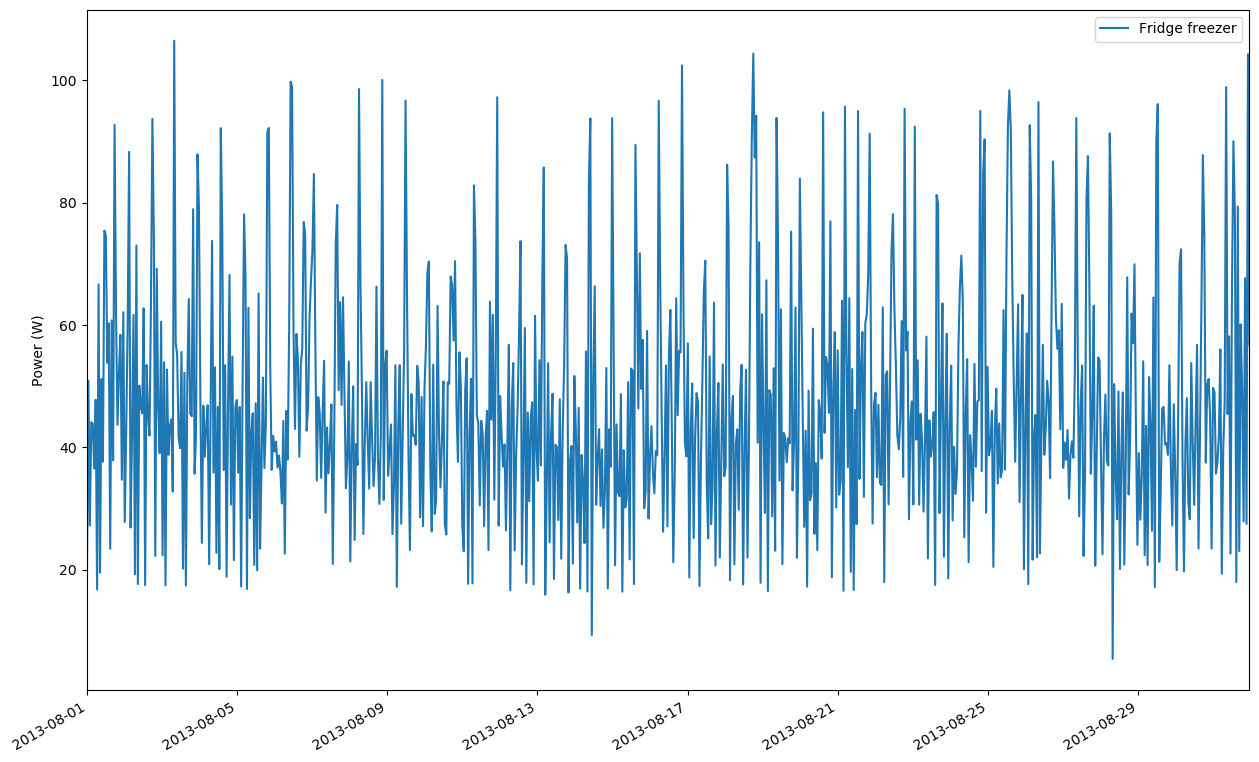

In [36]:
# Get good sections
# If we plot the raw power data then we see there is one large gap where, supposedly, 
# the metering system was not working. (if we were to zoom in then we'd see lots of 
# smaller gaps too):

fridge_meter.plot()

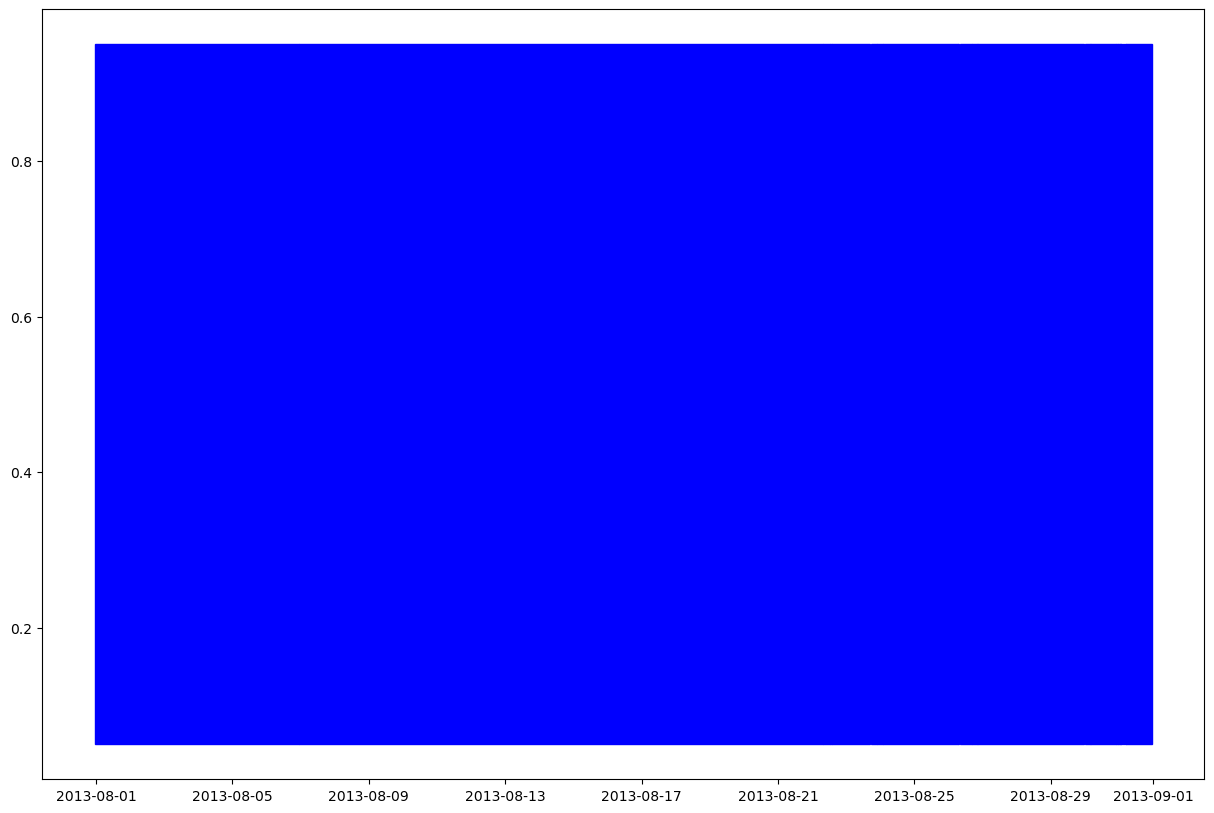

In [37]:
# We can automatically identify the 'good sections' (i.e. the sections where every pair of consecutive 
# samples is less than max_sample_period specified in the dataset metadata):

good_sections = fridge_meter.good_sections(full_results=True)

# specifying full_results=False would give us a simple list of 
# TimeFrames.  But we want the full GoodSectionsResults object so we can
# plot the good sections...

good_sections.plot()

# The blue chunks show where the data is good. However, it does not show any other 'blue bar' that 
# has a gap.  If there is one or more white gap,  then it can show the large gap seen in the raw power 
# data. There may have lots of smaller gaps that we cannot see at this zoom level.

# Your Summary and Finding

Your work should cover analysis of spot anomalies, test a hypothesis with list of questions & assumptions for driving of next data modelling works.

- Created Date: ??
- Updated Date: ??

**Findings:**
- ?
- ?
- ?